In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

train_original = train.copy()
test_original = test.copy()

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.shape

(614, 13)

In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
test.shape

(367, 12)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

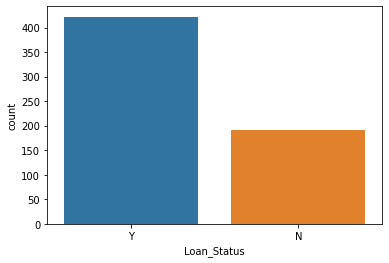

In [9]:
sns.countplot(x="Loan_Status", data=train)

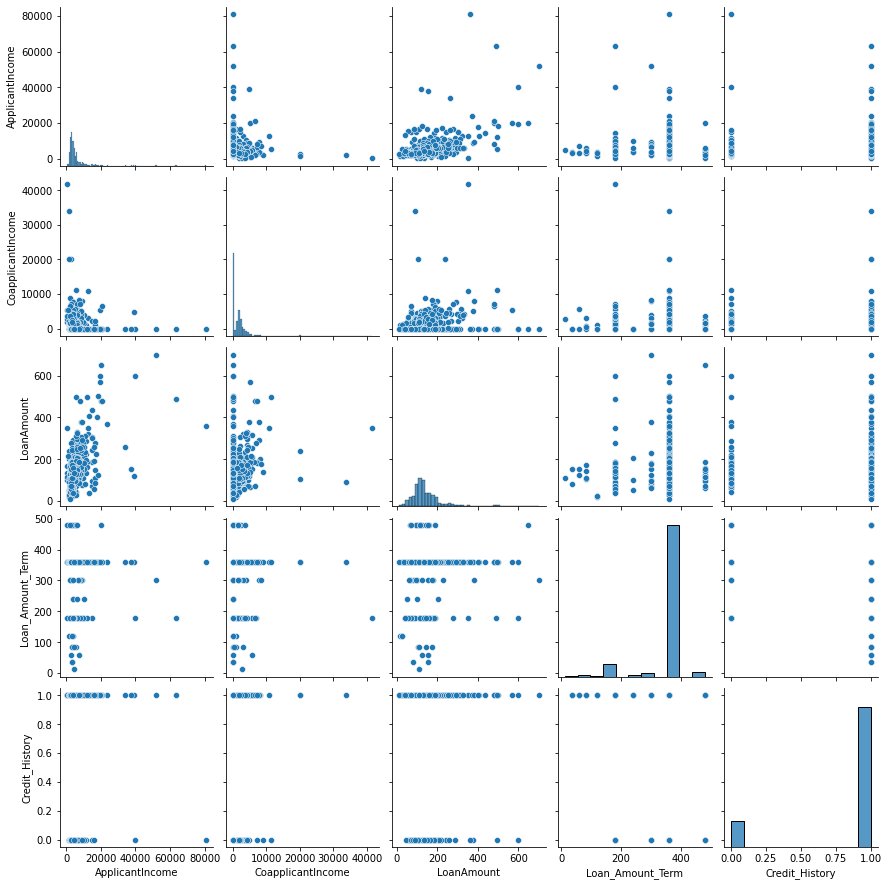

In [10]:
sns.pairplot(data=train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

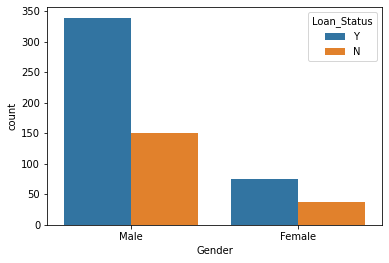

In [11]:
sns.countplot("Gender",data=train,hue="Loan_Status")

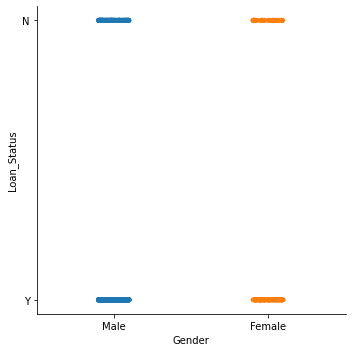

In [12]:
sns.catplot(x="Gender", y="Loan_Status", data=train)

In [13]:
df = pd.crosstab(train["Gender"],train["Loan_Status"])

<AxesSubplot:xlabel='Gender'>

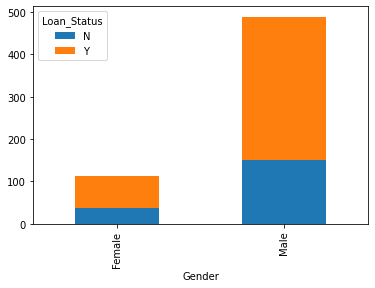

In [14]:
df.plot(kind="bar", stacked=True)

In [15]:
df = pd.crosstab(train["Married"],train["Loan_Status"])

<AxesSubplot:xlabel='Married'>

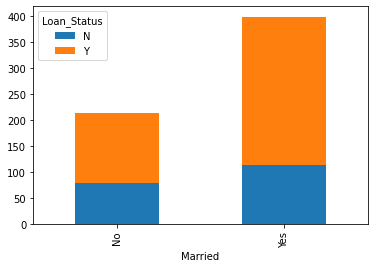

In [16]:
df.plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

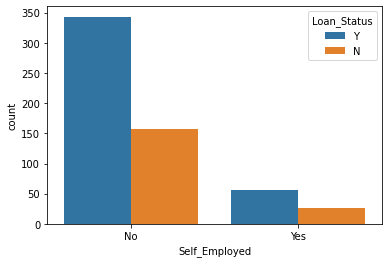

In [17]:
sns.countplot("Self_Employed",data=train,hue="Loan_Status")

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

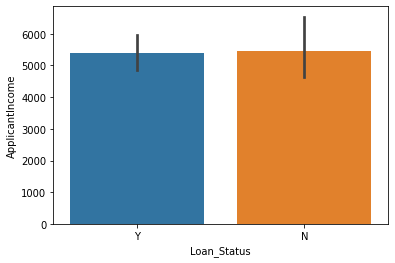

In [18]:
sns.barplot(x="Loan_Status",y="ApplicantIncome",data=train)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

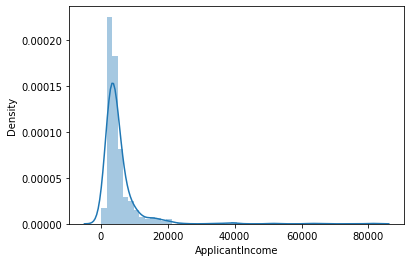

In [19]:
sns.distplot(train["ApplicantIncome"])

<AxesSubplot:xlabel='ApplicantIncome'>

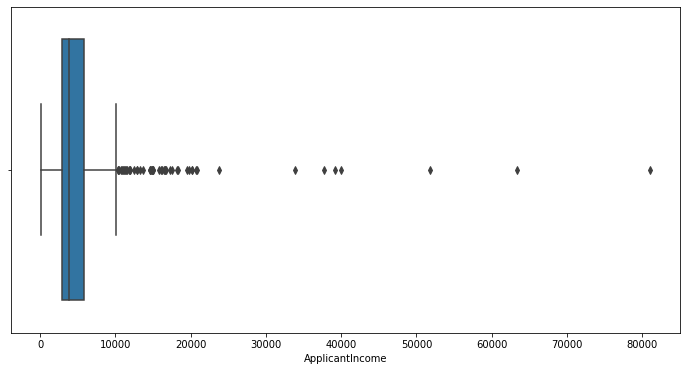

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x="ApplicantIncome",data=train)

<AxesSubplot:xlabel='Education', ylabel='count'>

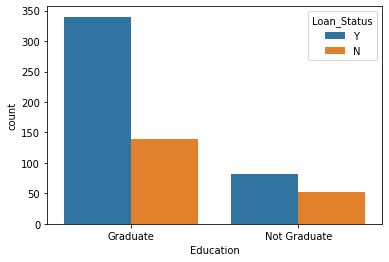

In [21]:
sns.countplot(x="Education",data=train,hue="Loan_Status")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

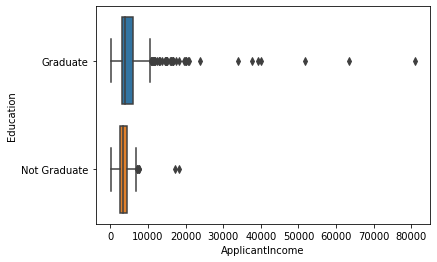

In [22]:
sns.boxplot(x="ApplicantIncome", y="Education", data=train)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

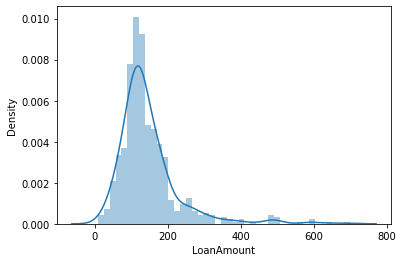

In [23]:
sns.distplot(train["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount'>

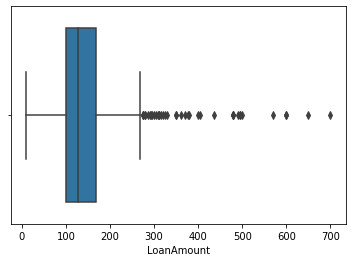

In [24]:
sns.boxplot("LoanAmount",data=train)

<AxesSubplot:>

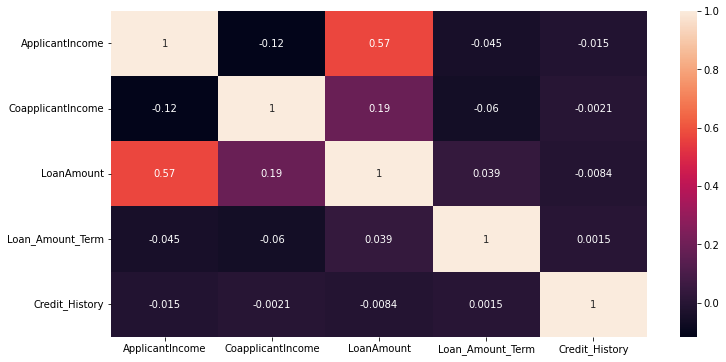

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot=True)

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [28]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
test["Gender"].fillna(train["Gender"].mode()[0],inplace=True)

In [29]:
train["Married"].fillna(train["Married"].mode()[0],inplace=True)

In [30]:
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
test["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)

In [31]:
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
test["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)

In [32]:
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [33]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [34]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Count'>

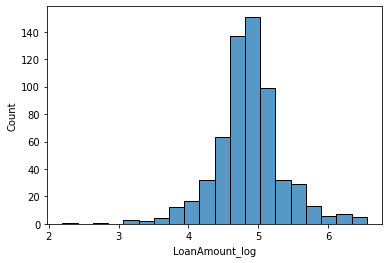

In [35]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])

sns.histplot(train['LoanAmount_log'],bins = 20)

In [36]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [37]:
train.drop('Loan_ID',1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109


In [38]:
test.drop('Loan_ID',1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595


In [39]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [40]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(X)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
pred_val = model.predict(X_val)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_val,pred_val)

0.772972972972973

In [50]:
pred_test = model.predict(test)

In [51]:
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [53]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [54]:
test['Total_Income']  = test['ApplicantIncome'] + train['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

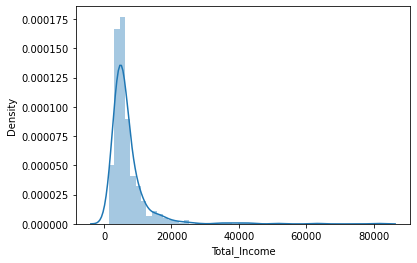

In [55]:
sns.distplot(train['Total_Income'])

In [56]:
train['Total_Income_log'] = np.log(train['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

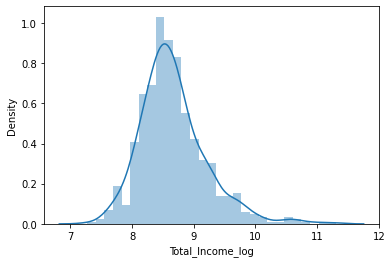

In [57]:
sns.distplot(train['Total_Income_log'])

In [58]:
test['Total_Income_log'] = np.log(test['Total_Income'])

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model_tree = DecisionTreeClassifier(random_state=1)

In [64]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
dtree_pred_val = model_tree.predict(X_val)

In [67]:
accuracy_score(y_val,dtree_pred_val)

0.7513513513513513

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(random_state=1,max_depth=10)

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [72]:
rfc_pred = rfc.predict(X_val)

In [74]:
accuracy_score(y_val,rfc_pred)

0.7513513513513513